In [2]:
import numpy as np

In [3]:
import pandas as pd

Business Problem: To identify why customers leave and how to reduce it. 
It is telecom company dataset. It is a tele-communication company which offers services like phoneservice, internet ..etc.,
Target variable is Churn (YES/NO) 

In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### STEP 3:

Next step is to classify features into types - Categorical and Numerical

In [10]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(cat_cols)


['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [11]:
print(num_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges']


### STEP 4: 

EXPLORING THE TARGET VARIABLE

In [12]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [14]:
df['Churn'].value_counts(normalize = True) #this is to get a percentage of churn i.e., what percentage of customers churned vs who did not.

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

### STEP 5:

Univariate EDA - Examining each feature individually to understand if the category is imbalanced. Are there any outliers? Is it skewed? Does it need any further cleaning?

In [15]:
cat_cols.remove('customerID')


--- gender ---
gender
Male      3555
Female    3488
Name: count, dtype: int64
------------------------------


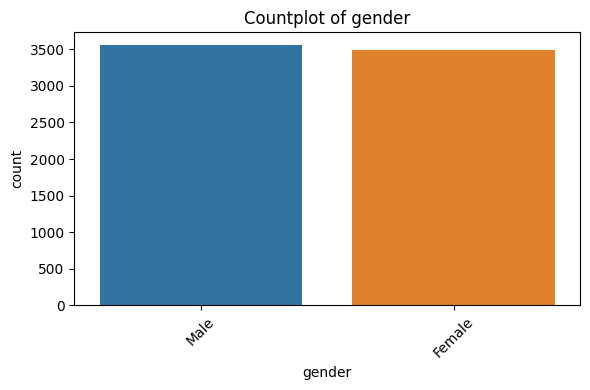


--- Partner ---
Partner
No     3641
Yes    3402
Name: count, dtype: int64
------------------------------


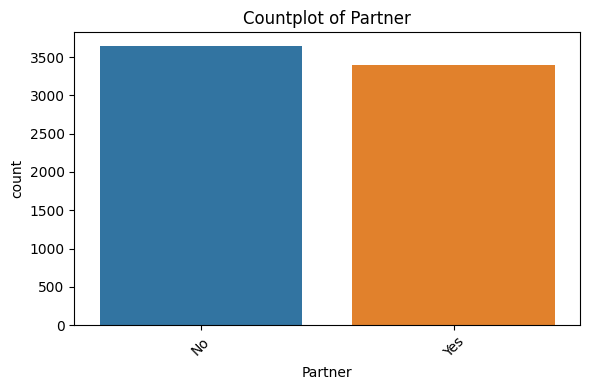


--- Dependents ---
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------------------------------


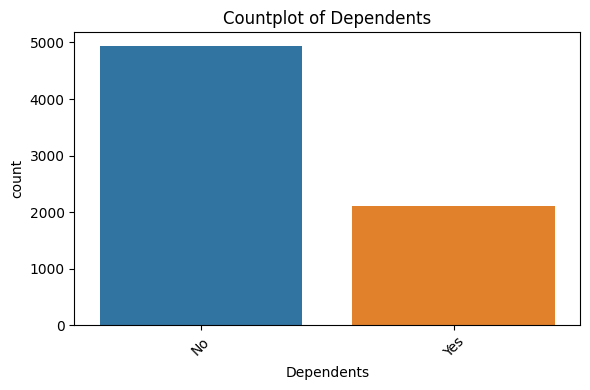


--- PhoneService ---
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
------------------------------


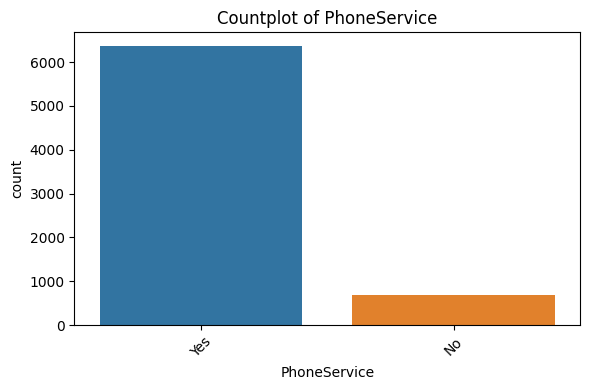


--- MultipleLines ---
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
------------------------------


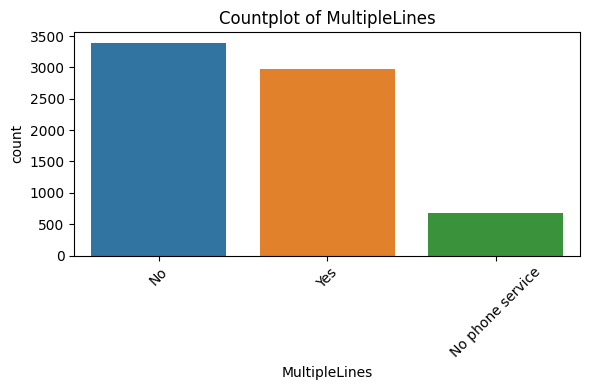


--- InternetService ---
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
------------------------------


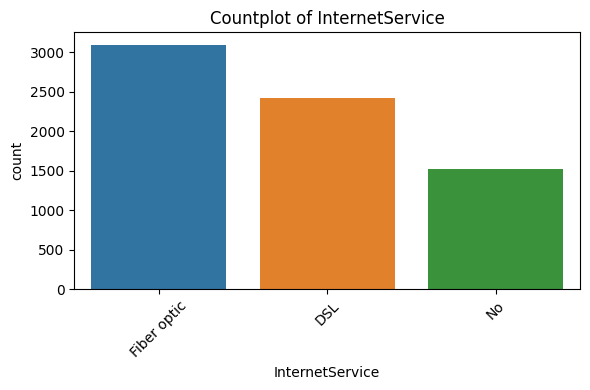


--- OnlineSecurity ---
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
------------------------------


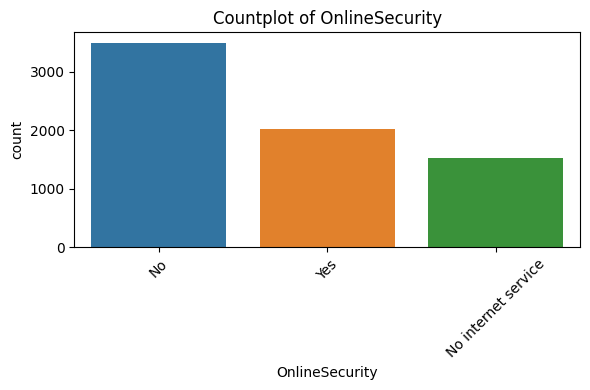


--- OnlineBackup ---
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
------------------------------


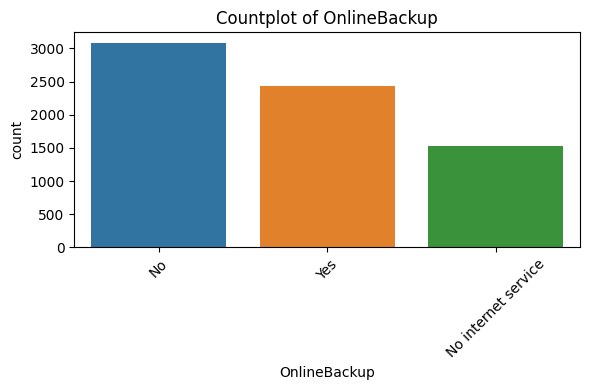


--- DeviceProtection ---
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
------------------------------


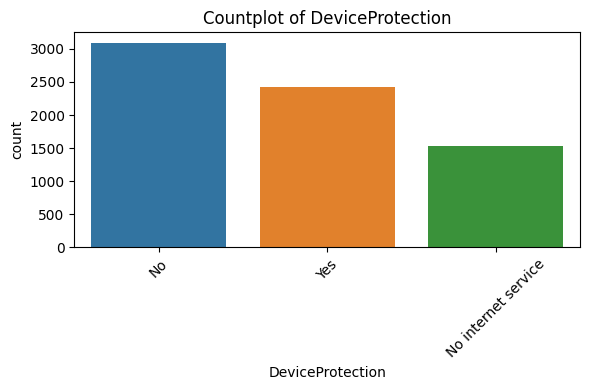


--- TechSupport ---
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
------------------------------


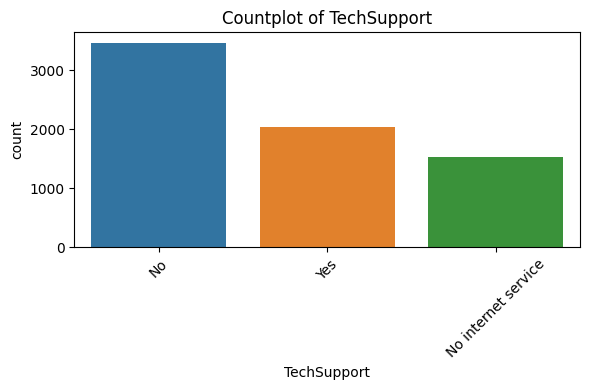


--- StreamingTV ---
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
------------------------------


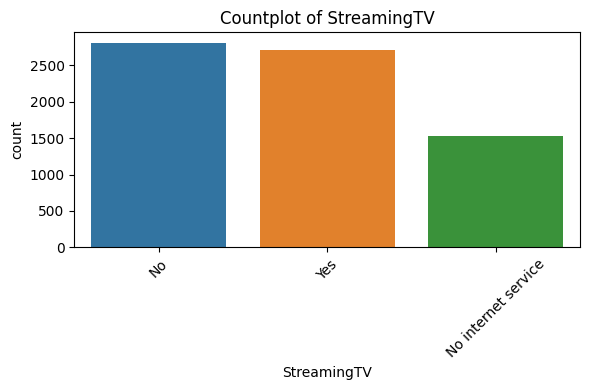


--- StreamingMovies ---
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64
------------------------------


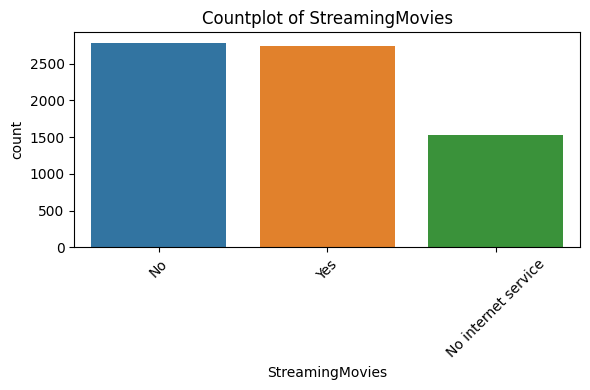


--- Contract ---
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
------------------------------


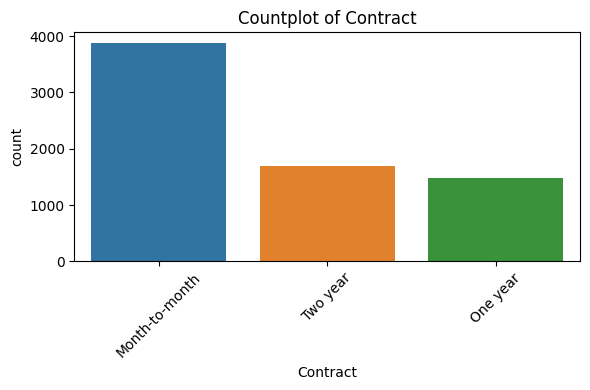


--- PaperlessBilling ---
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
------------------------------


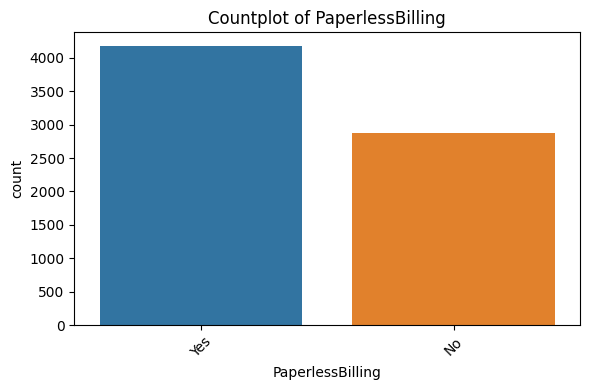


--- PaymentMethod ---
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
------------------------------


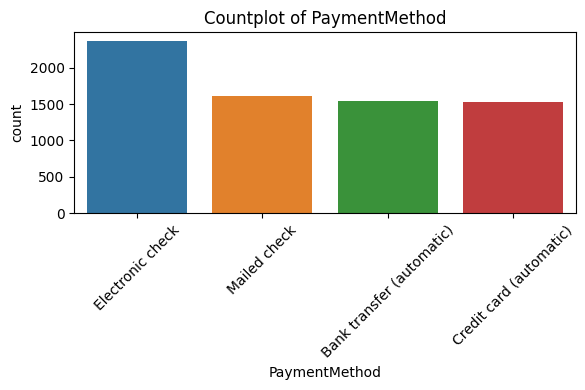


--- TotalCharges ---
TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64
------------------------------


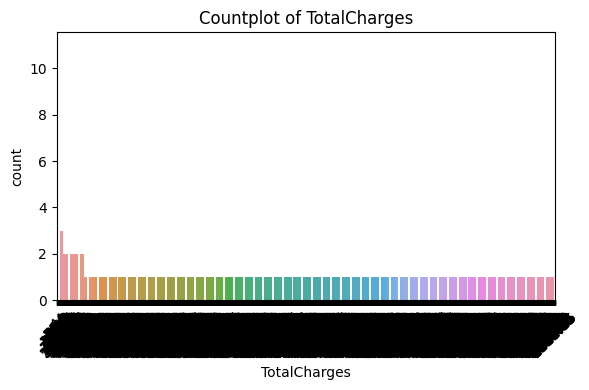


--- Churn ---
Churn
No     5174
Yes    1869
Name: count, dtype: int64
------------------------------


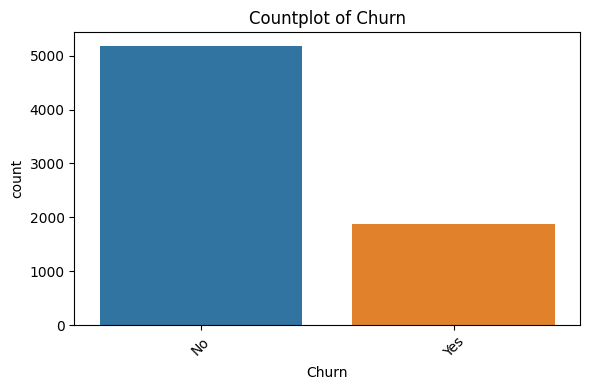

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print("-" * 30)
    
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Countplot of {col}")
    plt.tight_layout()
    plt.show()



--- SeniorCitizen ---
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
------------------------------


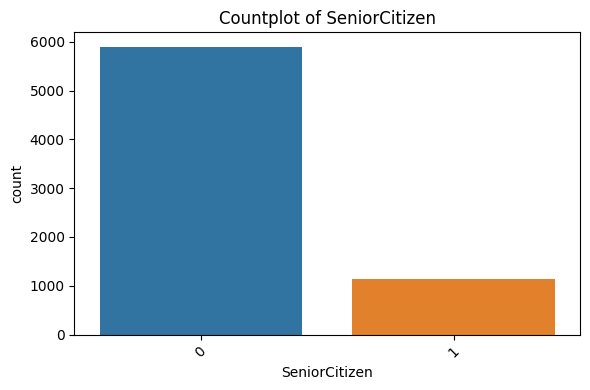


--- tenure ---
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
------------------------------


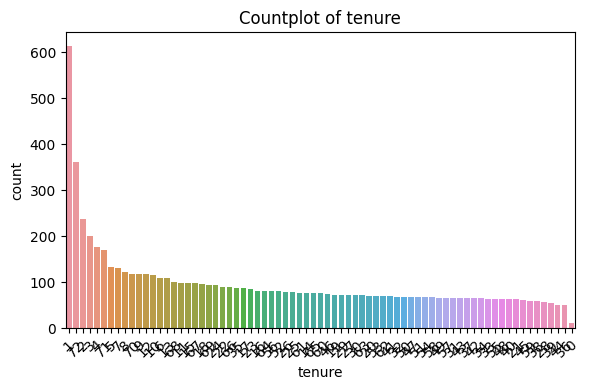


--- MonthlyCharges ---
MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64
------------------------------


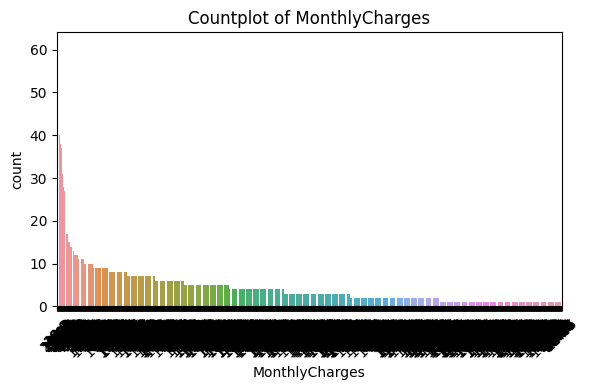

In [17]:
for col in num_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print("-" * 30)
    
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Countplot of {col}")
    plt.tight_layout()
    plt.show()

### Outlier Detection in Numerical Columns: 

There are multiple ways to detect outliers: 
    
1. IQR method - We flag points which are below Q1-1.5*IQR and Q3 - 1.5*IQR. iQR = Q1-Q3. 
Those are outliers. 

2. Z-Score method - Measures how far a datapoint is from the mean in terms of standard deviation. 

3. Also we can do box plots for visual detection. 




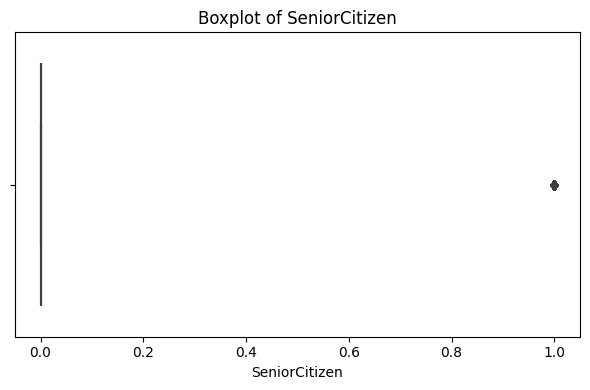

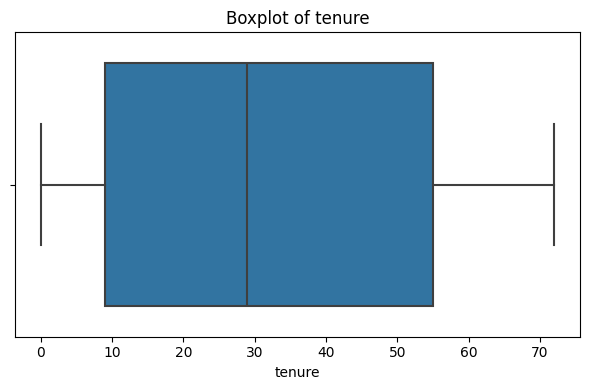

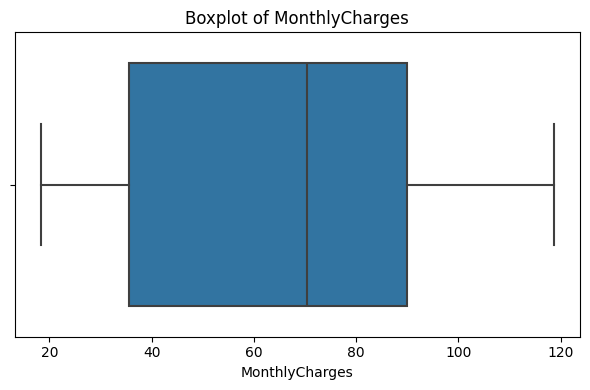

In [18]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [19]:
num_cols = [col for col in num_cols if col != 'Churn']


In [20]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"{col}: {outliers.shape[0]} outliers")
    
    
#Here it is showing that SeniorCitizens have 1142 outliers, but its a binary column, even though it is stored as int64. 




SeniorCitizen: 1142 outliers
tenure: 0 outliers
MonthlyCharges: 0 outliers


<Axes: xlabel='SeniorCitizen', ylabel='count'>

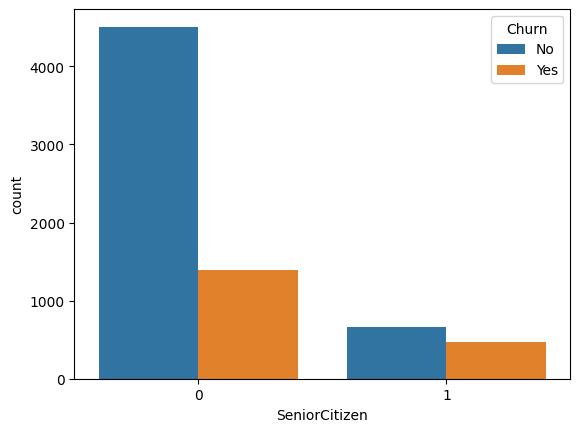

In [21]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)


### Step 5: Bivariate Analysis 

Checking how categorical features affect the target variable 

Checking how numerical features affect the target variable 

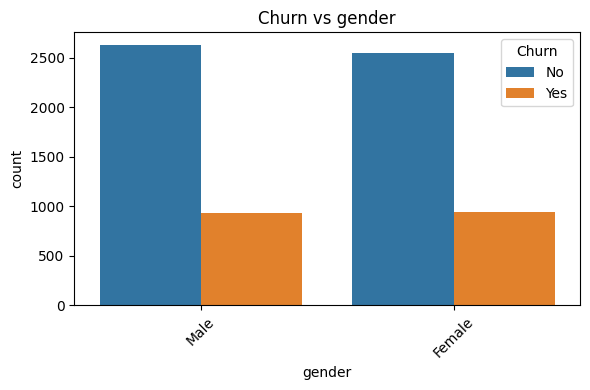

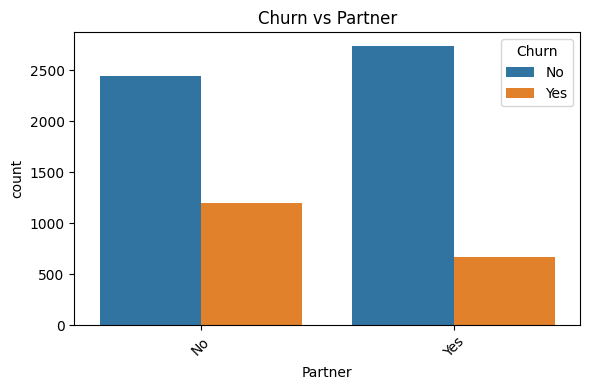

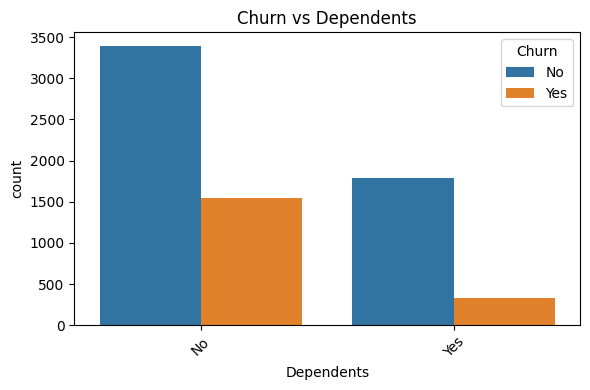

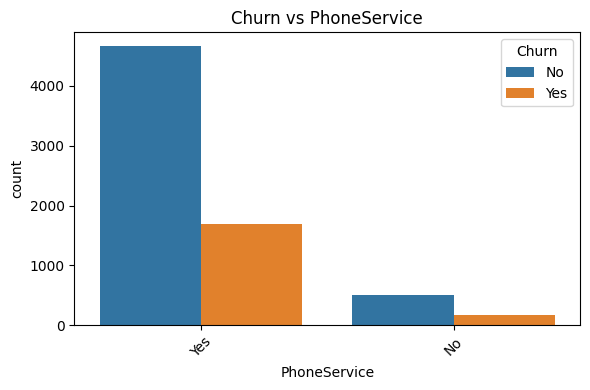

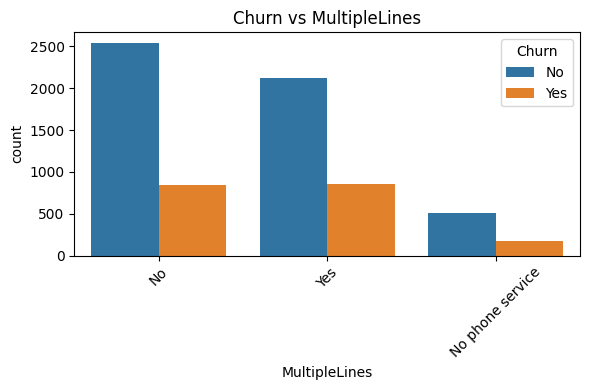

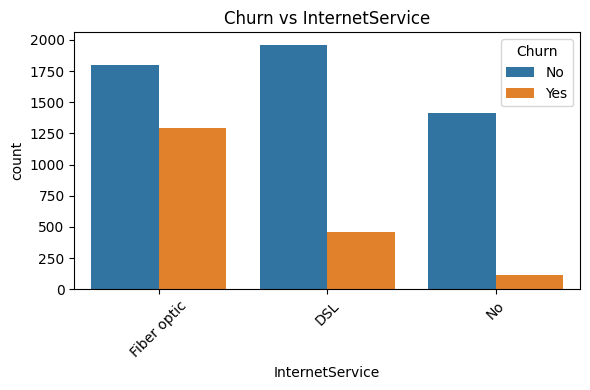

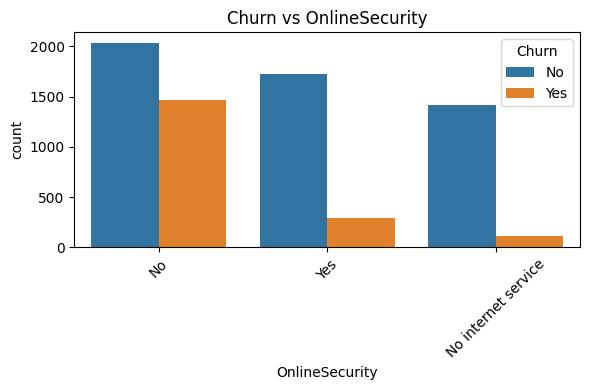

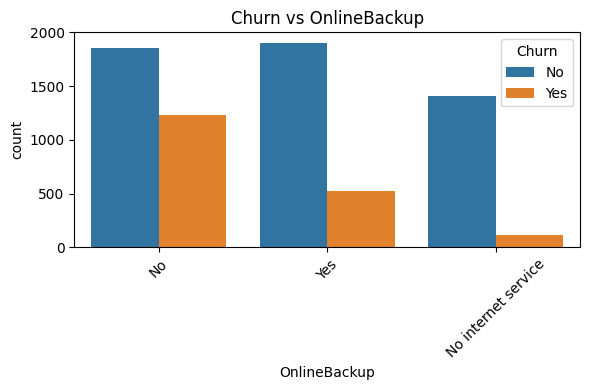

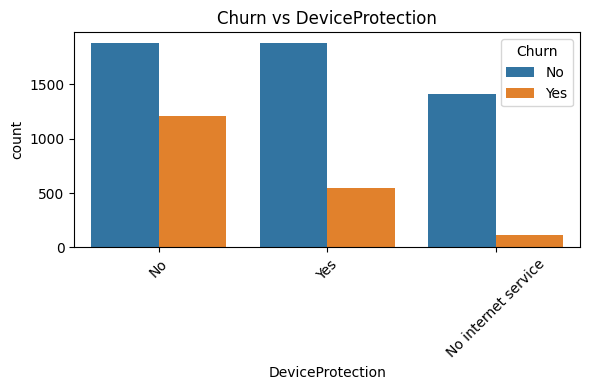

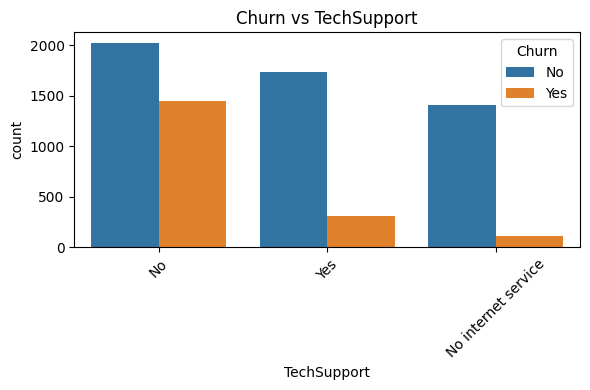

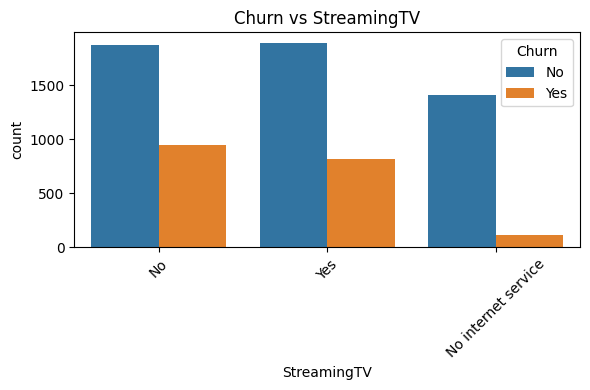

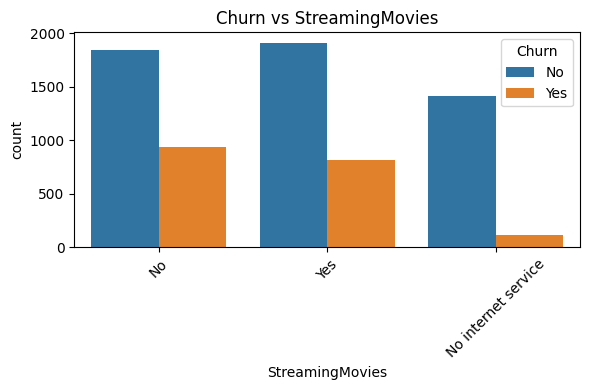

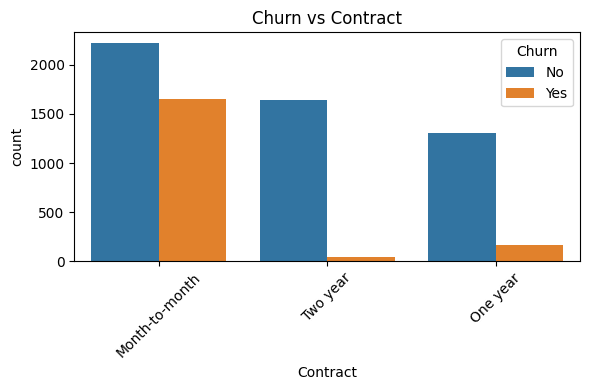

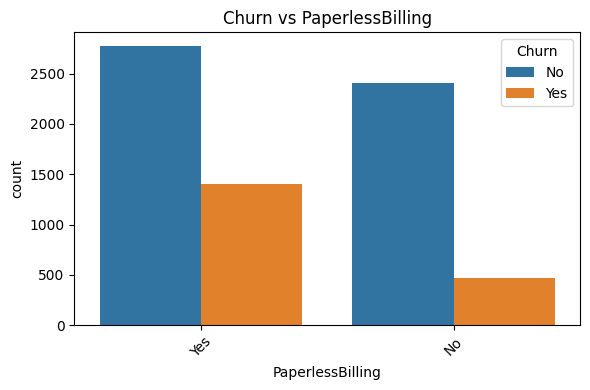

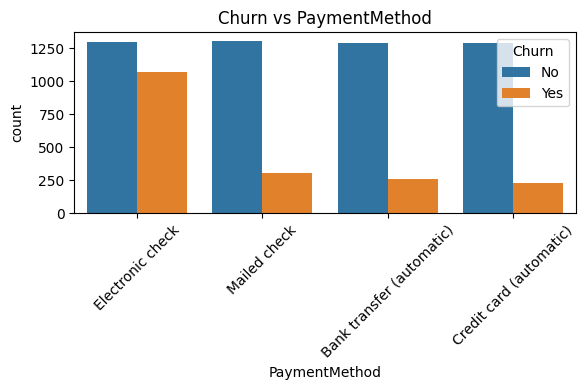

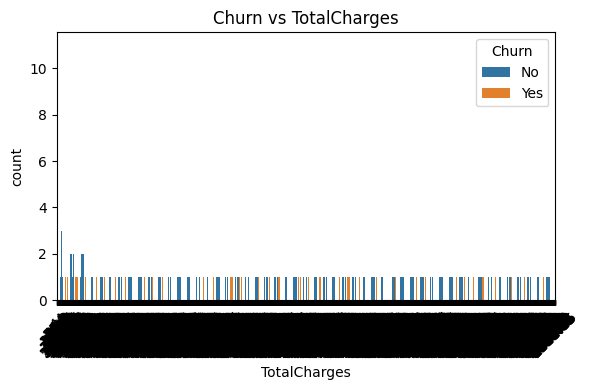

In [22]:
for col in cat_cols: 
    if col != 'Churn': 
        plt.figure(figsize=(6,4))
        sns.countplot(x=col, hue='Churn', data=df, order=df[col].value_counts().index)
        plt.title(f"Churn vs {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        

In [23]:
#Bivariate Analysis : Categorical Columns vs target variable: 
        
#pd.crosstab : what categories in this column has highest churn rates.
    
for col in cat_cols:
    print(f"\nChurn Rate by {col}:")
    churn_rate = pd.crosstab(df[col], df['Churn'], normalize='index').round(2)
    churn_rate.columns = ['No_Churn_%', 'Churn_%']
    print(churn_rate)

    


Churn Rate by gender:
        No_Churn_%  Churn_%
gender                     
Female        0.73     0.27
Male          0.74     0.26

Churn Rate by Partner:
         No_Churn_%  Churn_%
Partner                     
No             0.67     0.33
Yes            0.80     0.20

Churn Rate by Dependents:
            No_Churn_%  Churn_%
Dependents                     
No                0.69     0.31
Yes               0.85     0.15

Churn Rate by PhoneService:
              No_Churn_%  Churn_%
PhoneService                     
No                  0.75     0.25
Yes                 0.73     0.27

Churn Rate by MultipleLines:
                  No_Churn_%  Churn_%
MultipleLines                        
No                      0.75     0.25
No phone service        0.75     0.25
Yes                     0.71     0.29

Churn Rate by InternetService:
                 No_Churn_%  Churn_%
InternetService                     
DSL                    0.81     0.19
Fiber optic            0.58     0.42
No   

In [25]:
# Checking which columns has unique values: 

for col in df.columns:
    unique_vals = df[col].nunique()
    if unique_vals == 1:
        print(f"{col} → has only one unique value → likely drop")


In [27]:
from scipy.stats import chi2_contingency

cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('customerID')
cat_cols.remove('Churn')

for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    significance = 'Significant' if p < 0.05 else 'Not Significant'
    print(f"{col:<20} → p-value: {p:.4f} → {significance}")



gender               → p-value: 0.4866 → Not Significant
Partner              → p-value: 0.0000 → Significant
Dependents           → p-value: 0.0000 → Significant
PhoneService         → p-value: 0.3388 → Not Significant
MultipleLines        → p-value: 0.0035 → Significant
InternetService      → p-value: 0.0000 → Significant
OnlineSecurity       → p-value: 0.0000 → Significant
OnlineBackup         → p-value: 0.0000 → Significant
DeviceProtection     → p-value: 0.0000 → Significant
TechSupport          → p-value: 0.0000 → Significant
StreamingTV          → p-value: 0.0000 → Significant
StreamingMovies      → p-value: 0.0000 → Significant
Contract             → p-value: 0.0000 → Significant
PaperlessBilling     → p-value: 0.0000 → Significant
PaymentMethod        → p-value: 0.0000 → Significant
TotalCharges         → p-value: 0.5532 → Not Significant


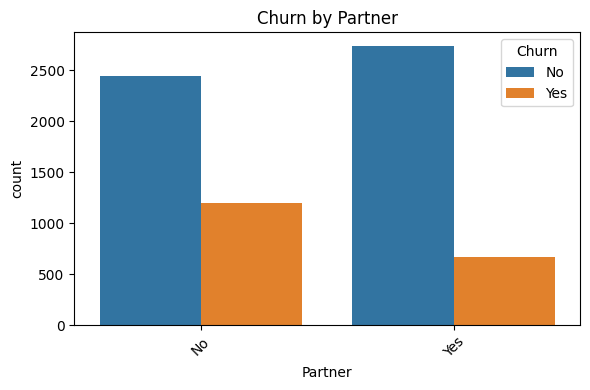

In [28]:
col = 'Partner'  

plt.figure(figsize=(6, 4))
sns.countplot(x=col, hue='Churn', data=df, order=df[col].value_counts().index)
plt.title(f'Churn by {col}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
# Lets quantify this: 

df.groupby('Partner')['Churn'].value_counts(normalize = True).unstack().round(2)
# Among people without partners, customers have churned more than people with partners. 

Churn,No,Yes
Partner,,
No,0.67,0.33
Yes,0.80,0.20


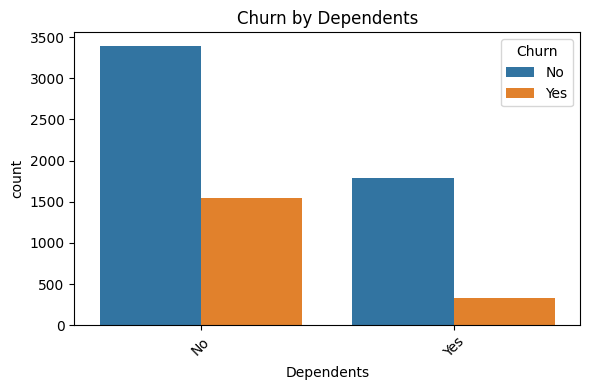

In [31]:
col = 'Dependents'  

plt.figure(figsize=(6, 4))
sns.countplot(x=col, hue='Churn', data=df, order=df[col].value_counts().index)
plt.title(f'Churn by {col}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
df.groupby('Dependents')['Churn'].value_counts(normalize = True).unstack().round(2)

#From this we can see that people with dependents churned more than the people who do not have any dependents. 

Churn,No,Yes
Dependents,,
No,0.69,0.31
Yes,0.85,0.15


In [36]:
df.groupby('MultipleLines')['Churn'].value_counts(normalize = True).unstack().round(2)

Churn,No,Yes
MultipleLines,,
No,0.75,0.25
No phone service,0.75,0.25
Yes,0.71,0.29


In [37]:

df.groupby('PhoneService')['Churn'].value_counts(normalize = True).unstack().round(2)

Churn,No,Yes
PhoneService,,
No,0.75,0.25
Yes,0.73,0.27


In [38]:

df.groupby('InternetService')['Churn'].value_counts(normalize = True).unstack().round(2)

Churn,No,Yes
InternetService,,
DSL,0.81,0.19
Fiber optic,0.58,0.42
No,0.93,0.07


In [39]:

df.groupby('OnlineSecurity')['Churn'].value_counts(normalize = True).unstack().round(2)

Churn,No,Yes
OnlineSecurity,,
No,0.58,0.42
No internet service,0.93,0.07
Yes,0.85,0.15


OnlineBackup         → p-value: 0.0000 → Significant
DeviceProtection     → p-value: 0.0000 → Significant
TechSupport          → p-value: 0.0000 → Significant
StreamingTV          → p-value: 0.0000 → Significant
StreamingMovies      → p-value: 0.0000 → Significant
Contract             → p-value: 0.0000 → Significant
PaperlessBilling     → p-value: 0.0000 → Significant
PaymentMethod

In [40]:
df.groupby('OnlineBackup')['Churn'].value_counts(normalize = True).unstack().round(2)

Churn,No,Yes
OnlineBackup,,
No,0.60,0.40
No internet service,0.93,0.07
Yes,0.78,0.22


In [41]:
df.groupby('DeviceProtection')['Churn'].value_counts(normalize = True).unstack().round(2)

Churn,No,Yes
DeviceProtection,,
No,0.61,0.39
No internet service,0.93,0.07
Yes,0.77,0.23


In [42]:
df.groupby('PaymentMethod')['Churn'].value_counts(normalize = True).unstack().round(2)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.83,0.17
Credit card (automatic),0.85,0.15
Electronic check,0.55,0.45
Mailed check,0.81,0.19


In [44]:
df.groupby('TechSupport')['Churn'].value_counts(normalize = True).unstack().round(2)

Churn,No,Yes
TechSupport,,
No,0.58,0.42
No internet service,0.93,0.07
Yes,0.85,0.15


In [45]:
df.groupby('PaperlessBilling')['Churn'].value_counts(normalize = True).unstack().round(2)

Churn,No,Yes
PaperlessBilling,,
No,0.84,0.16
Yes,0.66,0.34


In [46]:
df.groupby('StreamingMovies')['Churn'].value_counts(normalize = True).unstack().round(2)

Churn,No,Yes
StreamingMovies,,
No,0.66,0.34
No internet service,0.93,0.07
Yes,0.70,0.30


In [48]:
df.groupby('StreamingTV')['Churn'].value_counts(normalize = True).unstack().round(2)

Churn,No,Yes
StreamingTV,,
No,0.66,0.34
No internet service,0.93,0.07
Yes,0.70,0.30


In [33]:
#Doing T - test to find out significant columns: 

from scipy.stats import ttest_ind

significant_num_cols = []

for col in num_cols:
    churned = df[df['Churn'] == 'Yes'][col]
    not_churned = df[df['Churn'] == 'No'][col]
    
    stat, p = ttest_ind(churned, not_churned)
    
    if p < 0.05:
        significant_num_cols.append(col)
        print(f"{col:<20} → p-value: {p:.4f} → ✅ Significant")
    else:
        print(f"{col:<20} → p-value: {p:.4f} → ❌ Not Significant")


SeniorCitizen        → p-value: 0.0000 → ✅ Significant
tenure               → p-value: 0.0000 → ✅ Significant
MonthlyCharges       → p-value: 0.0000 → ✅ Significant


In [49]:
df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack().round(2)

Churn,No,Yes
SeniorCitizen,,
0,0.76,0.24
1,0.58,0.42


In [50]:
df.groupby('tenure')['Churn'].value_counts(normalize = True).unstack().round(2)

Churn,No,Yes
tenure,,
0,1.00,NaN
1,0.38,0.62
2,0.48,0.52
3,0.53,0.47
4,0.53,0.47
...,...,...
68,0.91,0.09
69,0.92,0.08
70,0.91,0.09


In [51]:
#Since we have way too many unique values in tenure, we are grouping them here: 

df['TenureGroup'] = pd.cut(df['tenure'], 
                           bins=[0, 12, 24, 48, 60, 72], 
                           labels=['0–12', '13–24', '25–48', '49–60', '61–72'])


In [54]:
pd.crosstab(df['TenureGroup'], df['Churn'], normalize='index').round(2)

Churn,No,Yes
TenureGroup,,
0–12,0.52,0.48
13–24,0.71,0.29
25–48,0.80,0.20
49–60,0.86,0.14
61–72,0.93,0.07


/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


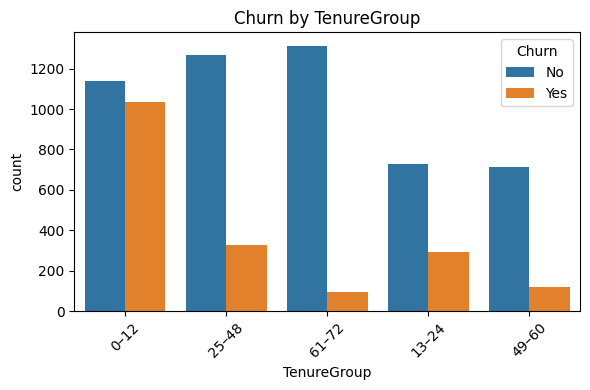

In [55]:
col = 'TenureGroup'  

plt.figure(figsize=(6, 4))
sns.countplot(x=col, hue='Churn', data=df, order=df[col].value_counts().index)
plt.title(f'Churn by {col}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
#Binning Monthly Charges Here: 

df['MonthlyChargeGroup'] = pd.cut(df['MonthlyCharges'], 
                                  bins=[0, 35, 70, 105], 
                                  labels=['Low', 'Medium', 'High'])


/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/saiswethalakkoju/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


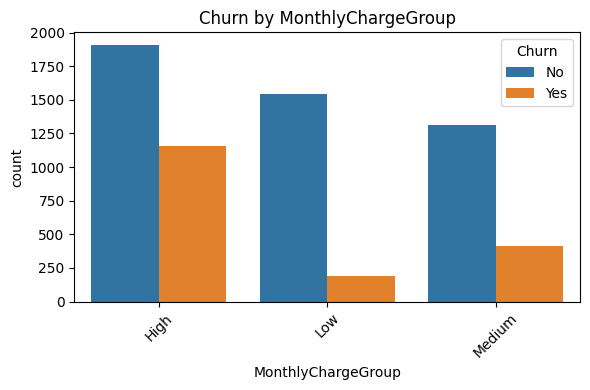

In [57]:
col = 'MonthlyChargeGroup'  

plt.figure(figsize=(6, 4))
sns.countplot(x=col, hue='Churn', data=df, order=df[col].value_counts().index)
plt.title(f'Churn by {col}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [58]:
df.groupby('PaymentMethod')['Churn'].value_counts(normalize = True).unstack().round(2)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.83,0.17
Credit card (automatic),0.85,0.15
Electronic check,0.55,0.45
Mailed check,0.81,0.19


So I have found what are significant features (both in Categorical and also Numerical Columns) that affect the churn rate. 

Here is what I have noticed. 

- **Gender** does not appear to have appear to have a significant impact on churn. The churn rate among females and males is relatively similar, suggesting that gender is not a strong differentiating factor in customer retention behavior. To back this up I have perfomed chi-square test to find how related are the gender and churn, which resulted in a p-value of 0.4, so hence it is not significant. 

- **Partner** This column does seem to have a significant impact on churn. People with partners have shown only 20% churn rate, while peole without partners have shown 33% churn rate, that means people without partners tend to leave the organisation more than the people with partners. 

- **SeniorCitizen** Senior citizens have a significantly higher churn rate (42%) compared to younger customers (24%).This suggests that senior customers are more likely to leave the telecom service.

- **Tenure Group** The longer a customer stays, the less likely they are to churn.

- **PaperLess Billing** Customers who opted for paperless billing have a significantly higher churn rate (34%) compared to those who receive paper bills (16%).

- **Payment Method** Customers who use electronic checks have a much higher churn rate (45%) than any other payment method.Those using automatic payment methods (bank transfer or credit card) have significantly lower churn rates (15–17%).

- **Monthly Charge Group** Monthly Charges have a significant impact on the churn rate. Lower monthly charge group have seen lesser churn rates compared to medium and high monthly charge groups. 

**Some of the Retention Strategies I Propose here from my analysis**

**1.Onboard and Nurture new customers.**

Insight: New Customers Churn the most. 

**Strategy**

Implement a “Welcome Journey” with onboarding emails, usage tips, and support touchpoints in the first 3 months.

Offer loyalty rewards (discounts or benefits) after 6 and 12 months to encourage longer retention.

**2.Reduce Churn from Paperless Billing Users**

Insight: Paperless billing users churn at 34%.

**Strategy:**

Send monthly usage summaries via email or SMS to keep them engaged.

A/B test bill formatting - make them clearer and less transactional, more value-driven.

Prompt feedback after 3 months of paperless billing to catch early dissatisfaction.

**3. Retain Senior Citizens with Personalized Support**

Insight: Senior citizens churn at 42%, much higher than younger users.

**Strategy:**

Provide dedicated senior support lines or “human-first” help options.

Simplify billing and service info through clear, non-digital communication (e.g., mailed summaries or call check-ins).

**4. Contract & Pricing Re-Design for High-Billing Customers**

Insight: Higher monthly charges correlate with more churn.

**Strategy:**

Create tiered pricing packages with value-added services for high-bill users.

Offer contract lock-in discounts (e.g., 10% off for 1-year pre-pay).

Let customers customize features to feel more in control of what they pay for.



